# TASK B - Category of Sexism

In [1]:
# # Install necessary libraries and make sure you have the correct version
# !pip install pandas numpy
# !pip3 install wordcloud
# !pip3 install imbalanced-learn
# !pip3 install tensorflow
# !pip3 install keras

In [2]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Reading csv file and transforming the dataframe

In [3]:
df = pd.read_csv('train_all_tasks.csv', usecols=['text', 'label_sexist', 'label_category'])
df = df[df['label_sexist'] == 'sexist']
# giving numerical values to categories 
df['label_category'] = df['label_category'].map({'1. threats, plans to harm and incitement': 0, '2. derogation': 1, '3. animosity': 2, 
                                                 '4. prejudiced discussions': 3})
df.describe()
df.groupby('label_category').describe().T

label_category                                                       0  \
text         count                                                 310   
             unique                                                310   
             top     fuck her off with a nine mm this is what you g...   
             freq                                                    1   
label_sexist count                                                 310   
             unique                                                  1   
             top                                                sexist   
             freq                                                  310   

label_category                                                       1  \
text         count                                                1590   
             unique                                               1590   
             top     just the inside of your wallet: cash, bank car...   
             freq                                                    1   
label_sexist count                                                1590   
             unique                                                  1   
             top                                                sexist   
             freq                                                 1590   

label_category                                                       2  \
text         count                                                1165   
             unique                                               1165   
             top     How about I talk shit to an idiot like you? Ar...   
             freq                                                    1   
label_sexist count                                                1165   
             unique                                                  1   
             top                                                sexist   
             freq                                                 1165   

label_category                                                       3  
text         count                                                 333  
             unique                                                333  
             top     If you want to attack culture and norms you ha...  
             freq                                                    1  
label_sexist count                                                 333  
             unique                                                  1  
             top                                                sexist  
             freq                                                  333

# Visualize categories of sexist texts

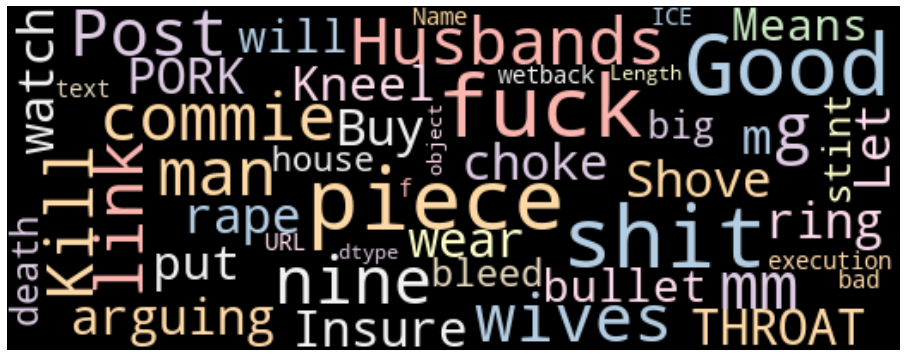

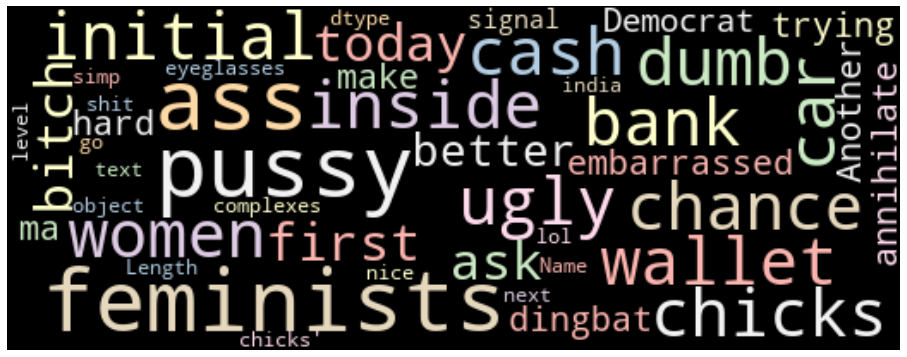

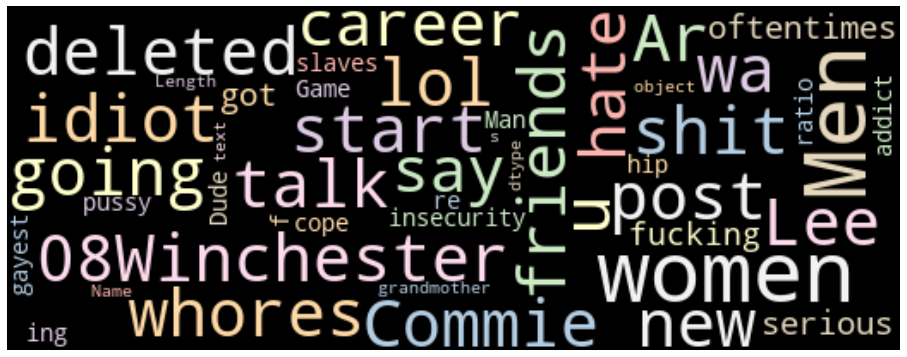

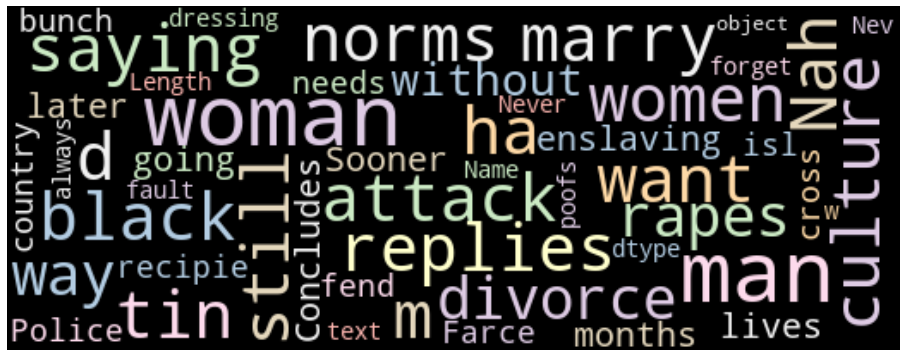

In [4]:
#word cloud for threats: haarm and incitement
threat_msg = df[df['label_category'] == 0]
threat_msg = str(threat_msg['text'])
threats_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(threat_msg)
plt.figure(figsize=(16,10))
plt.imshow(threats_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for derogation
derogation_msg = df[df['label_category'] == 1]
derogation_msg = str(derogation_msg['text'])
derogation_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(derogation_msg)
plt.figure(figsize=(16,10))
plt.imshow(derogation_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for animosity
animosity_msg = df[df['label_category'] == 2]
animosity_msg = str(animosity_msg['text'])
animosity_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(animosity_msg)
plt.figure(figsize=(16,10))
plt.imshow(animosity_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for prejudiced discussions
prejudiced_msg = df[df['label_category'] == 3]
prejudiced_msg = str(prejudiced_msg['text'])
prejudiced_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(prejudiced_msg)
plt.figure(figsize=(16,10))
plt.imshow(prejudiced_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

# Visualising & Fixing Imbalanced Dataset

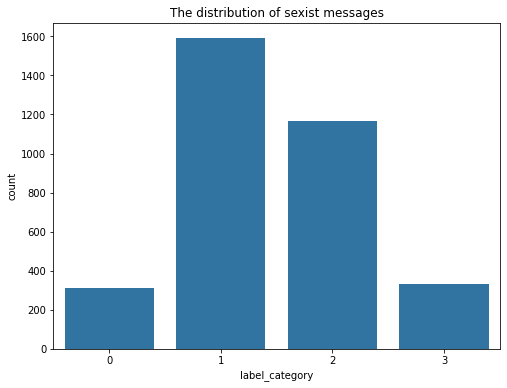

In [5]:

# print("Before SMOTE: ", np.unique(y, return_counts=True))

plt.figure(figsize=(8,6))
sns.countplot(x='label_category', data = df)
plt.title('The distribution of sexist messages')
plt.show()

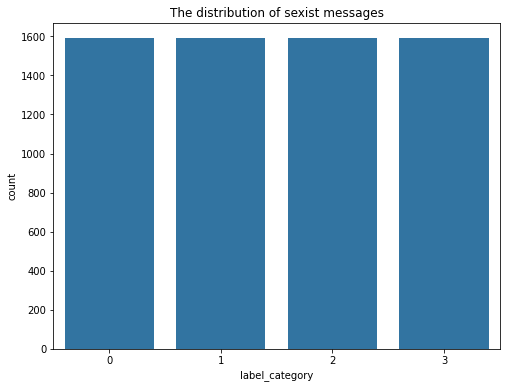

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your feature matrix and target labels
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['label_category']), df['label_category'])

df = pd.concat([X_resampled, y_resampled.rename('label_category')], axis=1)
# print(df['text'])
# print(df.drop(columns=['label_category']))

plt.figure(figsize=(8,6))
sns.countplot(x='label_category', data = df)
plt.title('The distribution of sexist messages')
plt.show()

Actually NLP is one of the most common areas in which resampling of data is needed as there are many text classification tasks dealing with imbalanced problem (think of spam filtering, insulting comment detection, article classification, etc.). But SMOTE seem to be problematic here for some reasons:

SMOTE works in feature space. It means that the output of SMOTE is not a synthetic data which is a real representative of a text inside its feature space.
On one side SMOTE works with KNN and on the other hand, feature spaces for NLP problem are dramatically huge. KNN will easily fail in those huge dimensions.

# Text Preprocessing

1. Train Test Split

In [7]:
#finding length of each text
df['text_length'] = df['text'].apply(len)

# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label_category'], test_size=0.2, random_state=434)

2. Tokenization of words

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining pre-processing parameters
max_len = 40 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 5000

# initiating tokenizer object 
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

8715

3. Padding and Sequencing

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding & sequencing for training data 
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)
print(training_padded.shape)
# Padding & sequencing for test data 
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)
print(testing_padded.shape)

(5088, 40)
(1272, 40)


In [36]:

from tensorflow.keras.preprocessing.text import one_hot
encoded_docs = [one_hot(d, vocab_size) for d in x_train]

padded_docs = pad_sequences(encoded_docs, maxlen=max_len, padding='post')
print(padded_docs.shape)

(5088, 40)


# Building and training models

1. Building LSTM model

In [20]:
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,  Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
# Define parameter
n_lstm = 128
drop_lstm = 0.3
embedding_dim = 16
drop_value = 0.2
n_dense = 24

# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(LSTM(n_lstm))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

model1.summary()

num_of_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model1.fit(padded_docs,
                     y_train,
                     epochs=num_of_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

model1.evaluate(testing_padded, y_test)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
159/159 - 5s - 29ms/step - accuracy: 0.2480 - loss: -1.0920e+01 - val_accuracy: 0.2516 - val_loss: -1.6893e+01
Epoch 2/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -2.1795e+01 - val_accuracy: 0.2516 - val_loss: -2.6572e+01
Epoch 3/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -3.1230e+01 - val_accuracy: 0.2516 - val_loss: -3.5802e+01
Epoch 4/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -4.0261e+01 - val_accuracy: 0.2516 - val_loss: -4.5008e+01
Epoch 5/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -4.9525e+01 - val_accuracy: 0.2516 - val_loss: -5.4153e+01
Epoch 6/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -5.8732e+01 - val_accuracy: 0.2516 - val_loss: -6.3334e+01
Epoch 7/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -6.7681e+01 - val_accuracy: 0.2516 - val_loss: -7.2458e+01
Epoch 8/30
159/159 - 4s - 23ms/step - accuracy: 0.2496 - loss: -7.6849e+01 - val_accuracy: 0.2516 - val_loss: -8.1584e+01
Epoch 9/30
159/159 - 4s 

[-273.0569152832031, 0.2515723407268524]